In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.head()

,date,store,item,sales
0,01-01-2013,1,1.0,13.0
1,02-01-2013,1,1.0,11.0
2,03-01-2013,1,1.0,14.0
3,04-01-2013,1,1.0,13.0
4,05-01-2013,1,1.0,10.0


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.head()

,date,store,item,sales
0,2013-01-01,1,1.0,13.0
1,2013-01-02,1,1.0,11.0
2,2013-01-03,1,1.0,14.0
3,2013-01-04,1,1.0,13.0
4,2013-01-05,1,1.0,10.0


In [7]:
monthly_sales = df.groupby(pd.Grouper(key='date', freq='ME'))['sales'].sum().reset_index()
monthly_sales.head()

,date,sales
0,2013-01-31,357558.0
1,2013-02-28,361417.0
2,2013-03-31,484895.0
3,2013-04-30,535545.0
4,2013-05-31,600368.0


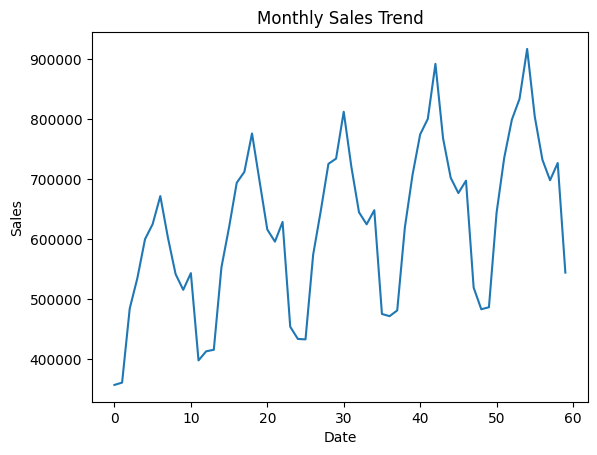

In [8]:
plt.figure()
plt.plot(monthly_sales.index, monthly_sales['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

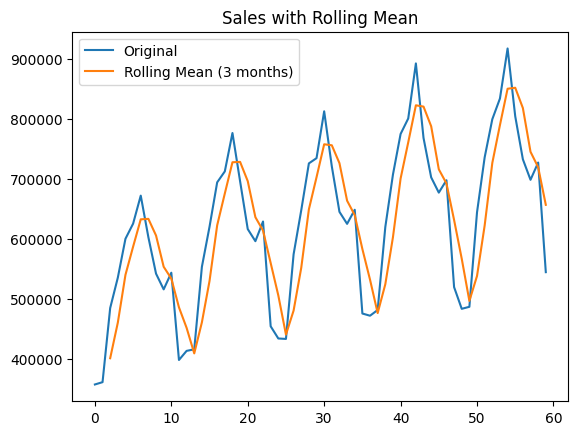

In [9]:
monthly_sales['rolling_mean'] = monthly_sales['sales'].rolling(window=3).mean()

plt.figure()
plt.plot(monthly_sales['sales'], label='Original')
plt.plot(monthly_sales['rolling_mean'], label='Rolling Mean (3 months)')
plt.legend()
plt.title("Sales with Rolling Mean")
plt.show()

In [10]:
split_point = int(len(monthly_sales) * 0.8)

train = monthly_sales.iloc[:split_point]
test = monthly_sales.iloc[split_point:]

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 48
Test size: 12


In [11]:
model = ExponentialSmoothing(train['sales'], trend='add', seasonal=None)
fitted_model = model.fit()

In [12]:
forecast = fitted_model.forecast(len(test))
forecast

,0
48,522037.753956
49,524306.505225
50,526575.256493
51,528844.007762
52,531112.759031
53,533381.510299
54,535650.261568
55,537919.012836
56,540187.764105
57,542456.515374


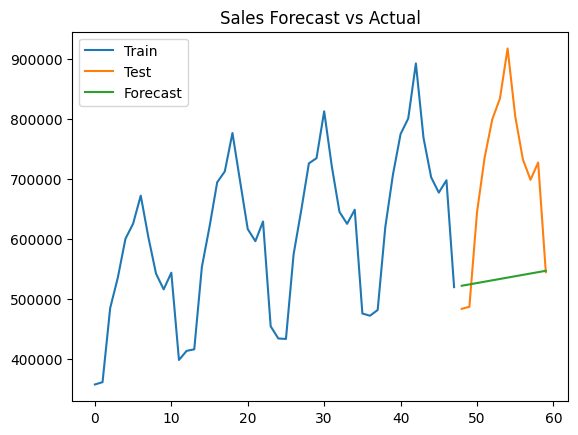

In [13]:
plt.figure()
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("Sales Forecast vs Actual")
plt.show()

In [14]:
mae = mean_absolute_error(test['sales'], forecast)
mape = np.mean(np.abs((test['sales'] - forecast) / test['sales'])) * 100

print("MAE:", mae)
print("MAPE:", mape, "%")

MAE: 179305.41024846435
MAPE: 23.380244962110805 %


In [15]:
forecast_df = pd.DataFrame({
    'date': test.index,
    'actual_sales': test['sales'].values,
    'forecast_sales': forecast.values
})

forecast_df.to_csv("forecast_output.csv", index=False)
forecast_df.head()

,date,actual_sales,forecast_sales
0,48,483620.0,522037.753956
1,49,486976.0,524306.505225
2,50,644454.0,526575.256493
3,51,735969.0,528844.007762
4,52,799506.0,531112.759031


In [17]:
report_text = f"""
Dataset: Store Item Demand Forecasting (train.csv)

Method Used: Exponential Smoothing

Train/Test Split: 80% train, 20% test (time-based)

Error Metrics:
MAE: {mae}
MAPE: {mape} %

Conclusion:
The model captures the overall trend in sales reasonably well. However, it may not fully capture seasonal spikes, so accuracy can be improved using seasonal models.
"""

with open("forecast_report.txt", "w") as f:
    f.write(report_text)

print("forecast_report.txt has been saved successfully!")

forecast_report.txt has been saved successfully!
